# TimeSeries prediction models comparison

In [1]:
import pandas as pd
from pathlib import Path
import glob

In [8]:
# in results directory there is a list of json files. Each contains a json object. I want to load those files to a single pandas dataframe, where each file is one row

def read_results(directory='results') -> pd.DataFrame:
    frames = []
    for file in glob.glob(f"{directory}/*.json"):
        with open(file) as f:
            data = pd.read_json(f, typ='series', orient='index')
            frames.append(data)
    res = pd.concat(frames, axis=1).T
    return res

df = read_results()
df.head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
0,8.080169,0.041759,0.20435,0.089071,XGBModel,10,electricity,1715277717.013348,"{'lags': 168, 'lags_past_covariates': None, 'l..."
1,2.162213,0.002918,0.054021,0.023792,XGBModel,1,electricity,1715277716.261915,"{'lags': 168, 'lags_past_covariates': None, 'l..."
2,3.431986,0.007242,0.085102,0.037877,XGBModel,2,electricity,1715277716.445576,"{'lags': 168, 'lags_past_covariates': None, 'l..."
3,4.825865,0.014002,0.11833,0.05343,XGBModel,3,electricity,1715277716.633687,"{'lags': 168, 'lags_past_covariates': None, 'l..."
4,737.660894,2.000761,1.414483,0.876537,NaiveSeasonal,3,walmart-sales,1715278069.307275,{'K': 1}
5,548.406172,0.751037,0.866624,0.516863,XGBModel,3,walmart-sales,1715278088.257127,"{'lags': 1, 'lags_past_covariates': None, 'lag..."
6,910.973558,2.090447,1.445838,0.928657,ARIMA,3,walmart-sales,1715278529.295173,"{'p': 1, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
7,5.957281,0.02101,0.144949,0.063442,XGBModel,5,electricity,1715277716.822633,"{'lags': 168, 'lags_past_covariates': None, 'l..."


## Model comparison

<Axes: xlabel='model'>

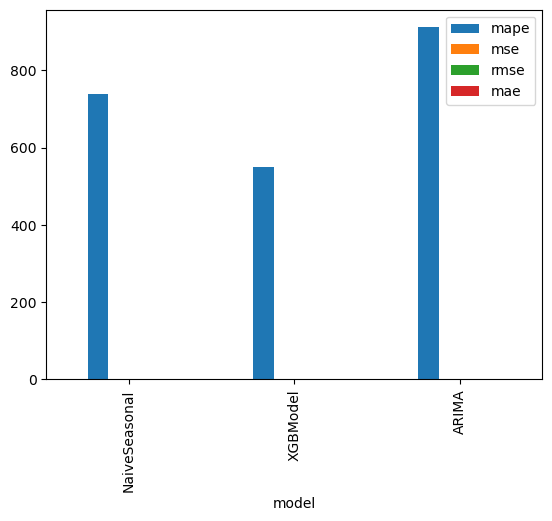

In [14]:
df_walmart = df[df['dataset'] == 'walmart-sales']

df_walmart.plot(x='model', y=['mse', 'rmse', 'mae'], kind='bar')